In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.constants import c, k_B, M_sun, G, m_p, sigma_sb, m_p
import astropy.units as u
from scipy.sparse import csr_matrix
from scipy.optimize import fsolve, differential_evolution, minimize
import numpy as np
import numba
import sys

sys.path.append('../Numerical_methods')
from bachelor_funcs import Σ_initial, find_temp, T_vis_strongDW, c_s2, ρ_cs_mid, C_w
from unchanged_values import r_au, sD1_log, Ω, T_req, color_use

# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 15}
mpl.rc('font', **font)

In [2]:
T0_strongDW_inactive = np.genfromtxt('..\Temperature_presets\T0_MRI_inactive_strongDW.csv') * u.K

K


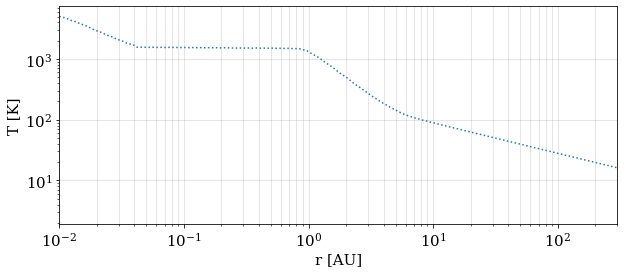

In [3]:
fig, axs = plt.subplots(figsize = (10, 4))
axs.loglog(r_au, T0_strongDW_inactive, ':')

axs.grid(axis = 'x', which = 'both', alpha = 0.4)
axs.grid(axis = 'y', which = 'major', alpha = 0.4)
axs.set(xlim = (0.01, 300), xlabel = 'r [AU]', ylabel = 'T [K]');
print(T0_strongDW_inactive.unit)

$$\partial_t\Sigma = \frac{1}{r}\partial_r\left[
    \frac{2}{r\Omega} 
    \left \{
    \partial_r\left(
    r^2\Sigma\alpha_{r\phi}c_s^2
    \right)
    + r^2\alpha_{\phi z}(\rho c_s^2)_{\text{mid}}
    \right\}\right]
    - C_{\text{w}}(\rho c_s)_{\text{mid}}
$$

## First try will be for:
### - Strong DW
### - MRI-inactive
### - Constant torque

In [4]:
def part1(T, Σ, α_rφ = 8e-5):
    to_dev = (r_au**2 * Σ * α_rφ * c_s2(T)).decompose()
    dev = (r_au**(-1) * (sD1_log @ to_dev) * to_dev.unit).decompose()
    return dev

In [5]:
def part2(T, Σ, α_φz = 1e-4):
    return (r_au**2 * α_φz * ρ_cs_mid(Σ) * np.sqrt(c_s2(T))).decompose() 

In [22]:
def part3(T, Σ, α_φz = 1e-4):
    return (C_w(T, Σ, α_φz) * ρ_cs_mid(Σ))
    